## [RQ1] Before diving deep into the dataset provided, it's crucial to understand its structure and main features. 
### Data scientists usually take the first step of performing an Exploratory Data Analysis (EDA). 
### What can you say about our dataset? Please perform an EDA and summarize the dataset's key characteristics using visualizations and tabular summaries.

## Importing these libraries which will help us to analyze the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk

## Below reading the dataset along with applying the dateparser function to ornagize data which is in columns 
#### timestamp_created, timestamp_updated, author.last_played

In [ ]:
'''  
# First time we read .csvs file using below code and further we will load directly the pickle file named steam_reviews_Pickle_File.pkl

def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

dataset = pd.read_csv('steam_reviews.csv', sep=",", header='infer',
                      index_col=0,
                      parse_dates=["timestamp_created","timestamp_updated","author.last_played"],
                      date_parser = dateparse)
'''

In [9]:
''' Printing the Shape of Dataset so it has 
    21747371 number of rows and
    22 number of columns
'''
dataset.shape

(21747371, 22)

In [10]:
''' The dataset has the following Column names in it. ''' 
dataset.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [4]:
''' This provides the information about dataset columns and their respected DataType'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          
 14  written_during_early_access     bool          
 15  a

### Let's see how many null values are there in each column

In [7]:
dataset.isnull().sum()

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

## Removing the null values as below we get updated datset having the number of records shown below too.

In [4]:
dataset.dropna(inplace=True)

In [5]:
dataset.shape

(21687945, 22)

# We have serialized the object of  pandas dataframe which contains the information of dataset after cleanUp

In [6]:
# with open('steam_reviews_Pickle_File.pkl', 'wb') as file:
   # pk.dump(dataset, file)

# De-serializing the pandas dataframe object to load data into variable named dataset

In [ ]:
dataset = ""
with open('steam_reviews_Pickle_File.pkl', 'rb') as file:
    dataset = pk.load(file)

### below is the statistical summary of dataset for numerical columns.

In [7]:
# Apply describe on numerical columns
numerical_columns = ['votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
                     'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever',
                     'author.playtime_last_two_weeks', 'author.playtime_at_review']

dataset[numerical_columns].describe()


,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07
mean,4.055771e+05,1.267431e+05,1.655262e-01,1.309590e-01,1.014071e+06,4.055857e+05,1.611046e+04,1.555894e+02,8.809664e+03
std,1.335567e+09,2.333105e+07,2.434493e-01,2.201967e+00,2.111716e+09,1.335567e+09,3.745428e+04,7.301101e+02,2.389216e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.000000e+00,1.253000e+03,0.000000e+00,5.590000e+02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+01,4.000000e+00,4.315000e+03,0.000000e+00,1.881000e+03
75%,1.000000e+00,0.000000e+00,4.829141e-01,0.000000e+00,1.460000e+02,1.000000e+01,1.493800e+04,0.000000e+00,6.825000e+03
max,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06


In [8]:
'''Below it shown the number of different languages used for game reviews '''
dataset.language.nunique()

28

In [9]:
'''Below it shown the names of different languages used for game reviews '''
dataset.language.unique()

array(['schinese', 'english', 'turkish', 'spanish', 'russian', 'koreana',
       'latam', 'brazilian', 'portuguese', 'vietnamese', 'polish',
       'french', 'german', 'hungarian', 'ukrainian', 'tchinese',
       'bulgarian', 'czech', 'italian', 'thai', 'greek', 'dutch',
       'finnish', 'romanian', 'japanese', 'swedish', 'danish',
       'norwegian'], dtype=object)

# Let's do some plotting to know more about dataset
## Bar chart and Pi Chart below shows the number of reviews written in each specific language

<Axes: title={'center': 'Number of reviews per language'}, xlabel='Language of the review', ylabel='Number of reviews'>

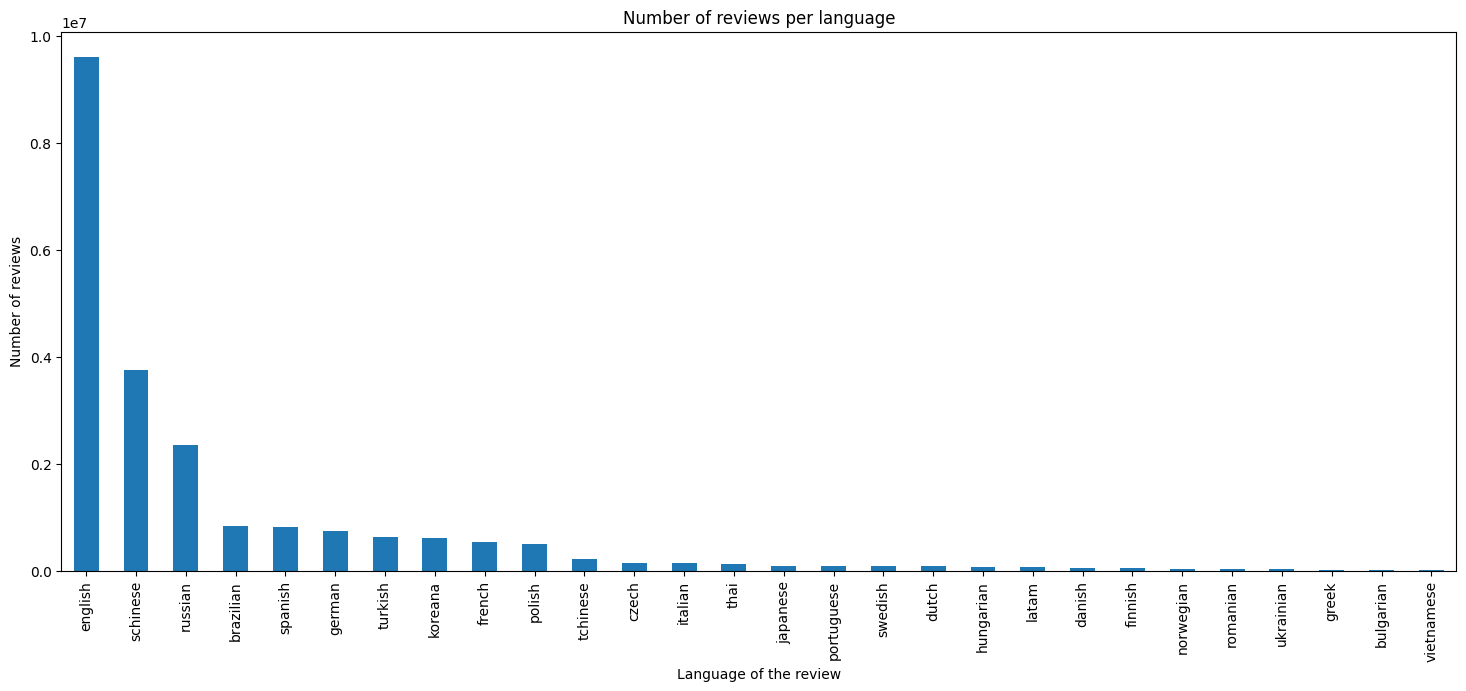

In [10]:
dataset.language.value_counts().plot.bar(xlabel="Language of the review", ylabel="Number of reviews", title="Number of reviews per language", figsize=(18,7))

<Axes: title={'center': 'Number of reviews per language'}, ylabel='count'>

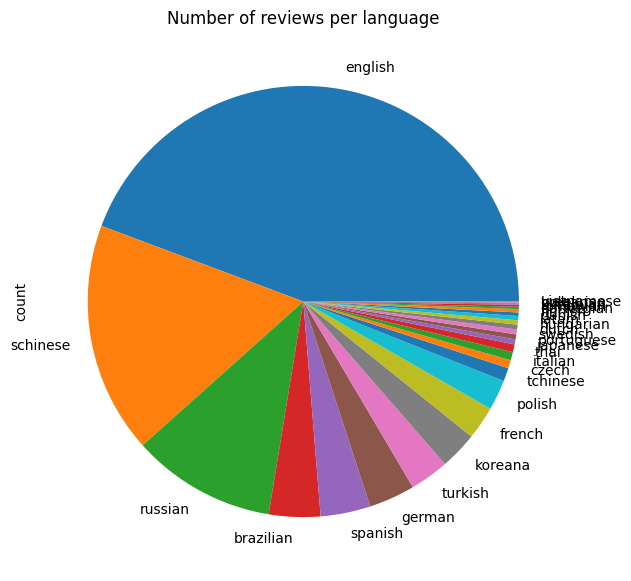

In [11]:
dataset.language.value_counts().plot.pie(title="Number of reviews per language", figsize=(18,7))

# below shown the number of unique applications reviewed by users

In [14]:
dataset['app_id'].nunique()

315

## Conclusive remarks for Q1:

Based on the exploratory data analysis (EDA) of the dataset, the following conclusions were drawn:

- **Number of Applications**: The dataset includes reviews for **315 unique applications** (`app_id`).
- **Different Languages**: Reviews are written in **28 different languages**, with the majority of reviews written in **English**, followed by **Chinese** and **Russian**. Other languages like **Greek**, **Ukrainian**, and **Vietnamese** have significantly fewer reviews.

### Key Insights from Numerical Data:

- **Votes Helpful**: Most reviews received **no helpful votes** (median = 0), though a few reviews received an extremely high number of helpful votes  
$$ 4.39 \times 10^{12} $$ 

- **Votes Funny**: Similar to helpful votes, the majority of reviews received **no funny votes**, but a small number received a large volume of funny votes $$ 4.29 \times 10^{9} $$
- **Weighted Vote Score**: The **average weighted vote score** is **0.165**, with the majority of reviews having relatively low scores. The maximum score is **0.996**.
- **Playtime Data**:
  - Users typically have significant playtime, with a **median playtime** of **4315 hours** (`author.playtime_forever`), and some users having **up to 3.74 million hours** of playtime.
  - **Playtime at review** is also relatively high, with a **median of 1881 hours**.

### Categorical/Binary Insights:

- **Review Recommendations**: Users have a boolean field (`recommended`) indicating whether they recommend the game, though its specific distribution is not included in this summary.
- **Steam Purchase and Received for Free**: The dataset distinguishes between reviews by users who **purchased** the game and those who **received it for free**, providing a valuable dimension for understanding user experience.




# Q2: Let's explore the dataset by analyzing the distribution of reviews across different applications.

#### Identify which applications have the highest and lowest number of reviews.